In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cleandata = pd.read_csv("/content/clean_product_data_with_filenames (1).csv")
outfits = pd.read_csv("/content/outfit_data.csv")

In [27]:
outfits.describe()

,cod_outfit
count,43582.000000
mean,3881.569111
std,2276.633552
min,1.000000
25%,1903.250000
50%,3879.000000
75%,5856.000000
max,7842.000000


In [ ]:
outfits.head()

In [ ]:
outfits.describe()

In [20]:
def print_dict(d):
    for key in d:
        print(key, d[key])

In [23]:
id_to_family_name = {key : value for key, value in enumerate(cleandata["des_product_family"].unique(), 1)}
family_name_to_id = {value : key for key, value in enumerate(cleandata["des_product_family"].unique(), 1)}

In [66]:
def process_outfit(id):
    items = outfits[outfits["cod_outfit"] == id].cod_modelo_color.unique()
    sz = items.size

    for i in np.arange(0, sz):
        for j in np.arange(i + 1, sz):
            cat_a = cleandata[cleandata["cod_modelo_color"] == items[i]].des_product_family.unique()
            cat_b = cleandata[cleandata["cod_modelo_color"] == items[j]].des_product_family.unique()

            if cat_a.size == 0 or cat_b.size == 0:
                print("SKIP", id)
                continue

            if cat_a.size > 1 or cat_b.size > 1:
                print("SHOULDN'T HAPPEN")
                continue

            cat_a = cat_a[0]
            cat_b = cat_b[0]

            id_a = family_name_to_id[cat_a]
            id_b = family_name_to_id[cat_b]

            arr[id_a][id_b] += 1
            arr[id_b][id_a] += 1

In [ ]:
arr = [[0 for i in range(25)] for j in range(25)]

for id in range(1, 8000):
    process_outfit(id)

In [110]:
for i in range(1, 25):
    print(id_to_family_name[i], end = " ")
    for j in range(1, 25):
        print(arr[i][j], end = " ")
    print()

Trousers 52 34 23 462 411 34 1824 1164 112 10 10 378 130 1 109 79 1564 87 257 256 70 21 34 37 
Jeans 34 36 7 314 329 26 1337 896 72 20 7 287 216 2 190 50 1233 44 64 296 50 30 16 23 
Dresses 23 7 12 19 28 4 2028 1093 241 12 1 3 51 1 47 39 1304 58 12 10 13 2 38 7 
Shirt 462 314 19 34 113 235 1358 815 85 12 101 68 135 4 57 48 1134 45 106 31 13 5 56 11 
Sweater 411 329 28 113 64 319 1169 869 65 2 78 53 132 8 108 117 1202 55 87 86 39 42 60 5 
Skirts 34 26 4 235 319 48 1207 806 112 5 17 337 117 0 114 47 1134 38 80 194 120 6 90 20 
Jewellery 1824 1337 2028 1358 1169 1207 8234 5555 544 124 398 1316 564 333 428 232 7459 252 420 882 228 64 161 81 
Bags 1164 896 1093 815 869 806 5555 254 560 343 253 882 383 164 353 154 4659 193 287 583 203 36 177 67 
Glasses 112 72 241 85 65 112 544 560 6 7 33 100 31 32 37 8 686 46 37 72 41 0 29 3 
Wallets & cases 10 20 12 12 2 5 124 343 7 1914 3 19 6 0 2 0 66 3 5 5 0 0 44 2 
Shorts 10 7 1 101 78 17 398 253 33 3 0 133 31 1 33 16 334 16 27 45 15 1 41 4 
Tops 378 2

In [92]:
nparr = np.array(arr)
nparr[1:25, 1:25].shape

(24, 24)

In [100]:
labels = np.array([id_to_family_name[id] for id in range(1, 25)])

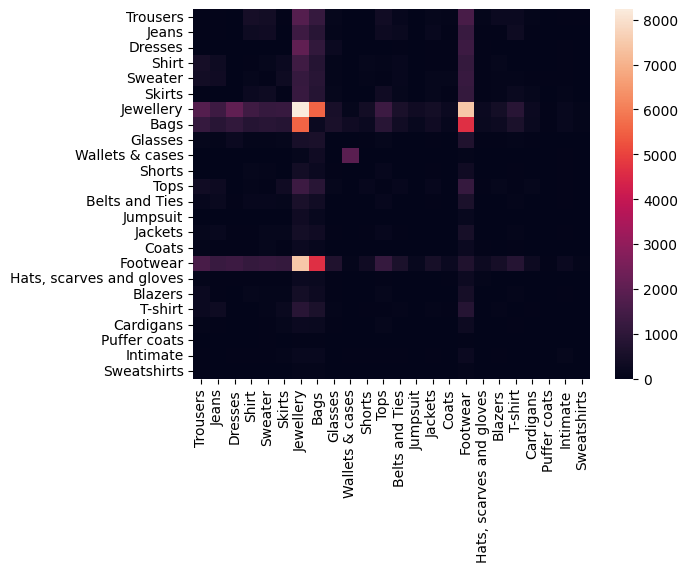

In [108]:
sns.heatmap(nparr[1:25, 1:25], xticklabels = labels, yticklabels = labels)
plt.savefig("Clothing_Graph.svg", format = "svg")

In [84]:
items = outfits[outfits["cod_outfit"] == 1304].cod_modelo_color.unique()
sz = items.size

print(sz)

for i in np.arange(0, sz):
    for j in np.arange(i + 1, sz):
        cat_a = cleandata[cleandata["cod_modelo_color"] == items[i]].des_product_family.unique()[0]
        cat_b = cleandata[cleandata["cod_modelo_color"] == items[j]].des_product_family.unique()[0]

        print(cat_a, cat_b)

5
Footwear Bags
Footwear Jewellery
Footwear Dresses
Footwear Jewellery
Bags Jewellery
Bags Dresses
Bags Jewellery
Jewellery Dresses
Jewellery Jewellery
Dresses Jewellery


In [42]:
cleandata[cleandata["cod_modelo_color"] == "41085800-02"].des_product_family.unique()[0]

'Trousers'